# <font color='#eb3483'> Exploratory Data Analysis </font>
## <font color='#eb3483'> 4. Variable Distribution </font>

In this part of the EDA we will analyze how are the different variables distributed

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)}) #Set our seaborn aesthetics (we're going to customize our figure size)

#Sometimes pandas gives us a lot of warnings, for the sake of simplicity, let's ignore them for this class
import warnings
warnings.filterwarnings("ignore")

### <font color='#eb3483'> Data loading </font>

We load the previous dataset (this works assuming you have the previous lesson folder next to today's lesson!)

In [2]:
vehicles = pd.read_pickle("data/vehicles.3.grouped.pkl")

In [3]:
vehicles.dtypes

co2                         float64
consumption_mpg               int64
cylinders                   float64
displacement                float64
drive                        object
fuel                         object
make                         object
model                        object
transmission                 object
vehicle_class                object
year                          int64
vehicle_class_type         category
vehicle_class_types          object
drive_type                 category
transmission_type          category
fuel_type                  category
displacement_type          category
consumption_type           category
co2_type                   category
consumption_liters_mile     float64
dtype: object

### <font color='#eb3483'>Numerical variable distribution</font>

We use histograms to see variable distribution

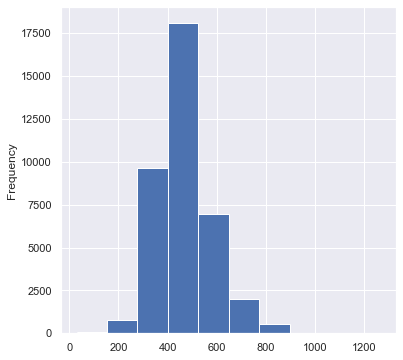

In [4]:
vehicles['co2'].plot.hist();

Or we can use a kde ([Kernel Density Estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation)).

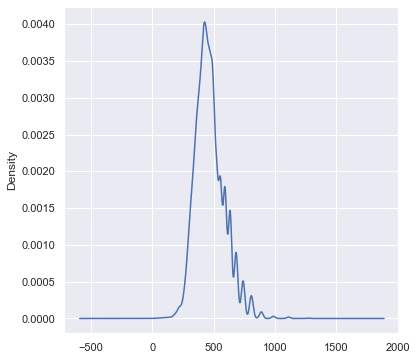

In [7]:
vehicles['co2'].plot.kde();

Now we can use `pywidgets` to analyze the distribution of numerical variables.

In [8]:
from ipywidgets import interact, fixed

In [9]:
#Create our plotting function
def numerical_variable_distribution(df, col):
    df[col].plot.kde()

In [11]:
numerical_columns = vehicles.select_dtypes(include=[np.number]).columns.tolist()
interact(numerical_variable_distribution, 
         col=numerical_columns, df=fixed(vehicles));

interactive(children=(Dropdown(description='col', options=('co2', 'consumption_mpg', 'cylinders', 'displacemen…

We see the variable `cylinders` has an unbalanced distribution.

In [12]:
vehicles['cylinders'].value_counts(normalize=True)

4.0     0.383363
6.0     0.350999
8.0     0.217695
5.0     0.019402
12.0    0.015737
3.0     0.007017
10.0    0.004189
2.0     0.001362
16.0    0.000236
Name: cylinders, dtype: float64

We are going to check if any of the numerical variables follow a normal distribution by doing a [probability plot](http://www.itl.nist.gov/div898/handbook/eda/section3/probplot.htm).

Scipy `probplot` compares a variable distribution with a perfect distribution the closer the plot is to a 45 degree line the closer the variable will fit the perfect distribution.

In [13]:
from scipy import stats

In [14]:
def numerical_variable_normality(col):
    stats.probplot(vehicles[col], plot=sns.mpl.pyplot) #Note we can access our plot environment using sns.mpl.pyplot

In [15]:
interact(numerical_variable_normality, col=numerical_columns);

interactive(children=(Dropdown(description='col', options=('co2', 'consumption_mpg', 'cylinders', 'displacemen…

We see that some variables seem like they follow a normal distribution. However we will make sure by doing a **normality test**.

A normality test is a hypothesis test where t he null hypothesis $H_0$ is that the sample follows a normal distribution. Given a significance level (95%) we will reject the null hypothesis if the p-value is less than 0.05.

In [16]:
for num_col in numerical_columns:
    _, pval = stats.normaltest(vehicles[num_col][vehicles[num_col].notnull()])
    if(pval < 0.05):
        print("Column {} doesn't follow a normal distribution".format(num_col))

Column co2 doesn't follow a normal distribution
Column consumption_mpg doesn't follow a normal distribution
Column cylinders doesn't follow a normal distribution
Column displacement doesn't follow a normal distribution
Column year doesn't follow a normal distribution
Column consumption_liters_mile doesn't follow a normal distribution


So we see none of the variables follow a normal distribution statistically speaking.

### <font color='#eb3483'> Categorical variable distribution </font>

One way to see how categorical variables are distributed is by using pandas `.value_counts()` function.

In [17]:
def categorical_variable_distribution(col):
    vehicles[col].value_counts(ascending=True,normalize=True).tail(20).plot.barh()

In [22]:
categorical_columns = vehicles.select_dtypes(
    ['object', 'category']).columns.tolist()

categorical_columns

['drive',
 'fuel',
 'make',
 'model',
 'transmission',
 'vehicle_class',
 'vehicle_class_type',
 'vehicle_class_types',
 'drive_type',
 'transmission_type',
 'fuel_type',
 'displacement_type',
 'consumption_type',
 'co2_type']

In [23]:
interact(categorical_variable_distribution, col=categorical_columns);

interactive(children=(Dropdown(description='col', options=('drive', 'fuel', 'make', 'model', 'transmission', '…

### <font color='#eb3483'> Conclusions </font>
- No numerical variable follows a normal distribution
- The variable `cylinders` has an unbalanced discrete distribution (the values 4, 6 and 8 account for 95% of the vehicles). We could group it into ` 4, 6, 8 and Other`.
- The top manufacturer is Chevrolet (10% of total )
- 65% of cars use regular gas
- 2/3 of cars have automatic transmission
- more than 2/3 of cars have 2 wheel drive
- most common vehicle type is small cars (40% of total)